<a href="https://colab.research.google.com/github/Alenushka2013/movie-recommender-svd/blob/main/Movies_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Завантаження даних

In [ ]:
import pandas as pd
raw_path = 'https://raw.githubusercontent.com/OyaKesgin/Building-Recommendation-Engines/refs/heads/main/user_ratings.csv'
df = pd.read_csv(raw_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [ ]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
df.title.unique()[:10]

array(['Toy Story (1995)', 'Grumpier Old Men (1995)', 'Heat (1995)',
       'Seven (a.k.a. Se7en) (1995)', 'Usual Suspects, The (1995)',
       'From Dusk Till Dawn (1996)', 'Bottle Rocket (1996)',
       'Braveheart (1995)', 'Rob Roy (1995)', 'Canadian Bacon (1995)'],
      dtype=object)

In [ ]:
# How many different movies are contained in movie_genre_df?
df.title.nunique()

9719

In [ ]:
# Кількість користувачів
df.userId.nunique()

610

## Неперсоналізовані рекомендації

Один із найпростіших способів надання рекомендацій – це спиратися на знання аудиторії та рекомендувати те, що вже є найпопулярнішим. Підрахунок як часто   переглядали кожен фільм у наборі даних.

In [ ]:
movie_popularity = df['title'].value_counts().sort_values(ascending = False)
movie_popularity.head(10)

,count
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278
Star Wars: Episode IV - A New Hope (1977),251
Jurassic Park (1993),238
Braveheart (1995),237
Terminator 2: Judgment Day (1991),224


### Покращені неперсоналізовані рекомендації

Те, що фільм переглянула велика кількість людей, не обов'язково означає, що він сподобався глядачам. Щоб зрозуміти, що глядач насправді відчував про фільм, корисні більш точні дані. На щастя, у наборі даних  також є оцінки кожного глядача. Для цього потрібно знайти середній рейтинг кожного фільму в наборі даних, а потім фільми з найвищим середнім рейтингом.

In [ ]:
# Find the mean of the ratings given to each title
average_rating_df = df[["title", "rating"]].groupby('title').mean()

# Order the entries by highest average rating to lowest
sorted_average_ratings = average_rating_df.sort_values(by="rating",  ascending=False)

# Inspect the top movies
display(sorted_average_ratings.head(15))

,rating
title,
Karlson Returns (1970),5.0
Zeitgeist: Moving Forward (2011),5.0
"Dream of Light (a.k.a. Quince Tree Sun, The) (Sol del membrillo, El) (1992)",5.0
Dragons: Gift of the Night Fury (2011),5.0
12 Angry Men (1997),5.0
Justice League: Doom (2012),5.0
Junior and Karlson (1968),5.0
Jump In! (2007),5.0
"Human Condition III, The (Ningen no joken III) (1961)",5.0


### Поєднання популярності та відгуків

In [ ]:
# Create a list of only the frequently watched movies
movie_popularity = df["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 50]

avg_ratings = df.groupby("title")["rating"].mean().round(3)
popular_movies_df = pd.DataFrame({
    "watch_count": popular_movies,
    "avg_rating": avg_ratings[popular_movies.index]
})

display(popular_movies_df.sort_values(by = 'avg_rating', ascending = False).head(20))

,watch_count,avg_rating
title,,
"Shawshank Redemption, The (1994)",317,4.429
"Godfather, The (1972)",192,4.289
Fight Club (1999),218,4.273
Cool Hand Luke (1967),57,4.272
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),97,4.268
Rear Window (1954),84,4.262
"Godfather: Part II, The (1974)",129,4.260
"Departed, The (2006)",107,4.252
Goodfellas (1990),126,4.250


**Спостереження:**

Фільми з найвищими оцінками мають невелику кількість переглядів.

### Знаходження всіх пар фільмів

In [ ]:
from itertools import permutations

# Create the function to find all permutations
def find_movie_pairs(x):
  pairs = pd.DataFrame(list(permutations(x.values, 2)),
                       columns=['movie_a', 'movie_b'])
  return pairs

# Apply the function to the title column and reset the index
movie_combinations = df.groupby('userId')['title'].apply(find_movie_pairs)

display(movie_combinations.head(10))

movie_a                      movie_b
userId                                                 
1      0  Toy Story (1995)      Grumpier Old Men (1995)
       1  Toy Story (1995)                  Heat (1995)
       2  Toy Story (1995)  Seven (a.k.a. Se7en) (1995)
       3  Toy Story (1995)   Usual Suspects, The (1995)
       4  Toy Story (1995)   From Dusk Till Dawn (1996)
       5  Toy Story (1995)         Bottle Rocket (1996)
       6  Toy Story (1995)            Braveheart (1995)
       7  Toy Story (1995)               Rob Roy (1995)
       8  Toy Story (1995)        Canadian Bacon (1995)
       9  Toy Story (1995)             Desperado (1995)

In [ ]:
# Calculate how often each item in movies_a occurs with the items in movies_b
combination_counts = movie_combinations.groupby(['movie_a', 'movie_b']).size()

# Inspect the results
display(combination_counts.head())

movie_a     movie_b                                   
'71 (2014)  (500) Days of Summer (2009)                   1
            10 Cloverfield Lane (2016)                    1
            127 Hours (2010)                              1
            13 Assassins (Jûsan-nin no shikaku) (2010)    1
            13 Hours (2016)                               1
dtype: int64

Тепер, коли знайдені фільми, які найчастіше поєднуються, можна дати перші рекомендації. Хоча не має жодної інформації про людину, яка дивиться, і навіть не відомо жодних деталей про фільм, цінні рекомендації все одно можна дати, дослідивши, які групи фільмів дивляться одні й ті ж люди.

Наступним кроком розглядаються фільми, які часто дивляться ті самі люди, що дивилися «Тора», а потім використовуються ці дані, щоб дати рекомендацію тому, хто щойно переглянув фільм.

In [ ]:
df[df["title"].str.contains("Thor", case=False, na=False)].head()

,userId,movieId,rating,timestamp,title,genres
56530,18,86332,3.5,1455051197,Thor (2011),Action|Adventure|Drama|Fantasy|IMAX
56531,62,86332,4.0,1521490291,Thor (2011),Action|Adventure|Drama|Fantasy|IMAX
56532,68,86332,3.5,1332629042,Thor (2011),Action|Adventure|Drama|Fantasy|IMAX
56533,73,86332,5.0,1464275342,Thor (2011),Action|Adventure|Drama|Fantasy|IMAX
56534,106,86332,4.0,1467360481,Thor (2011),Action|Adventure|Drama|Fantasy|IMAX


In [ ]:
# Перетворення Series з MultiIndex у DataFrame
combination_df = combination_counts.reset_index()
combination_df.columns = ["movie_a", "movie_b", "count"]

# Sort the counts from highest to lowest
combination_df.sort_values(by="count", ascending=False, inplace=True)

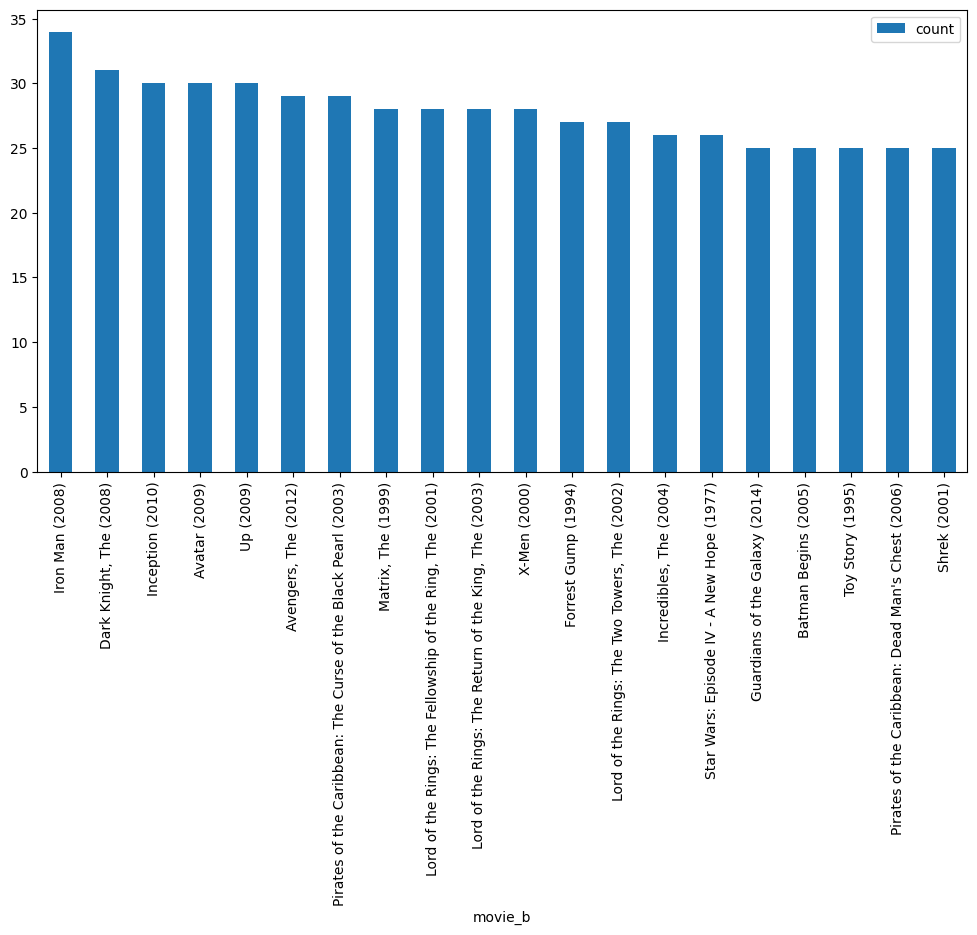

In [ ]:
import matplotlib.pyplot as plt

# Find the movies most frequently watched by people who watched Thor
thor_df = combination_df[combination_df["movie_a"] == "Thor (2011)"].head(20)

# Plot the results
thor_df.plot.bar(x="movie_b", y="count", figsize=(12,6))
plt.show()

## Рекомендації на основі контенту

In [ ]:
# Get the rows in movie_genre_df which have a name equal to Toy Story and save this as toy_story_genres.
# Select only the rows with values in the name column equal to Toy Story
toy_story_genres = df[df.title == 'Toy Story (1995)']

# Inspect the subset
display(toy_story_genres)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
210,606,1,2.5,1349082950,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
211,607,1,4.0,964744033,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
212,608,1,2.5,1117408267,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
213,609,1,3.0,847221025,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
# Transform movie_genre_df to a table called movie_cross_table.
# Assign the subset of movie_cross_table that contains Toy Story to the variable toy_story_genres_ct and inspect the results.
movie_genre_df = df[['title', 'genres']].drop_duplicates()

display(movie_genre_df)

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
215,Grumpier Old Men (1995),Comedy|Romance
267,Heat (1995),Action|Crime|Thriller
369,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
572,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...
100831,Bloodmoon (1997),Action|Thriller
100832,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,Hazard (2005),Action|Drama|Thriller
100834,Blair Witch (2016),Horror|Thriller


In [ ]:
movie_genre_df['genres_split'] = movie_genre_df['genres'].str.split('|')

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(movie_genre_df['genres_split'])

# Створюємо новий датафрейм із жанрами
genre_df = pd.DataFrame(genre_matrix, columns=mlb.classes_, index=movie_genre_df['title'])

display(genre_df.head())

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Heat (1995),0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
Seven (a.k.a. Se7en) (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
"Usual Suspects, The (1995)",0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
genre_df.loc[['Toy Story (1995)', 'Yogi Bear (2010)']]

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Yogi Bear (2010),0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Вибираємо рядки для двох фільмів
subset = genre_df.loc[['Toy Story (1995)', 'Yogi Bear (2010)']]

# Виконуємо побітове "І" (AND) між рядками
common_genres = (subset.iloc[0] & subset.iloc[1])

# Підраховуємо кількість збігів
num_common = common_genres.sum()

print("Кількість спільних жанрів:", num_common)
print("Які саме жанри збігаються:")
print(common_genres[common_genres == 1].index.tolist())

Кількість спільних жанрів: 2
Які саме жанри збігаються:
['Children', 'Comedy']


### Порівняння окремих фільмів за допомогою подібності Jaccard

In [ ]:
# Import numpy and the Jaccard similarity function
import numpy as np
from sklearn.metrics import jaccard_score

movie_cross_table = genre_df.copy()

In [ ]:
# Import functions from scipy
from scipy.spatial.distance import pdist, squareform

# Calculate all pairwise distances
jaccard_distances = pdist(movie_cross_table.values, metric='jaccard')

# Convert the distances to a square matrix
jaccard_similarity_array = 1 - squareform(jaccard_distances)

# Wrap the array in a pandas DataFrame
jaccard_similarity_df = pd.DataFrame(jaccard_similarity_array, index=movie_cross_table.index, columns=movie_cross_table.index)

# Print the top 5 rows of the DataFrame
display(jaccard_similarity_df.head())

title,Toy Story (1995),Grumpier Old Men (1995),Heat (1995),Seven (a.k.a. Se7en) (1995),"Usual Suspects, The (1995)",From Dusk Till Dawn (1996),Bottle Rocket (1996),Braveheart (1995),Rob Roy (1995),Canadian Bacon (1995),...,Return of the One-Armed Swordsman (1969),Hitchcock/Truffaut (2015),He Never Died (2015),Southbound (2016),Gen-X Cops (1999),Bloodmoon (1997),Sympathy for the Underdog (1971),Hazard (2005),Blair Witch (2016),31 (2016)
title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1.000000,0.166667,0.00,0.000000,0.000000,0.125000,0.285714,0.0,0.000000,0.166667,...,0.166667,0.0,0.142857,0.0,0.142857,0.000000,0.0,0.00,0.000000,0.0
Grumpier Old Men (1995),0.166667,1.000000,0.00,0.000000,0.000000,0.200000,0.500000,0.0,0.200000,0.333333,...,0.000000,0.0,0.250000,0.0,0.250000,0.000000,0.0,0.00,0.000000,0.0
Heat (1995),0.000000,0.000000,1.00,0.250000,0.500000,0.400000,0.166667,0.2,0.166667,0.000000,...,0.250000,0.0,0.000000,0.0,0.500000,0.666667,0.5,0.50,0.250000,0.0
Seven (a.k.a. Se7en) (1995),0.000000,0.000000,0.25,1.000000,0.666667,0.200000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.250000,0.333333,0.0,0.25,0.333333,0.0
"Usual Suspects, The (1995)",0.000000,0.000000,0.50,0.666667,1.000000,0.166667,0.166667,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.200000,0.250000,0.2,0.20,0.250000,0.0


### Створення рекомендацій на основі жанрів фільмів

In [ ]:
# Wrap the preloaded array in a DataFrame
jaccard_similarity_df = pd.DataFrame(jaccard_similarity_array, index=movie_cross_table.index, columns=movie_cross_table.index)

# Find the values for the movie Thor
jaccard_similarity_series = jaccard_similarity_df.loc['Thor (2011)']

# Sort these values from highest to lowest
ordered_similarities = jaccard_similarity_series.sort_values(ascending = False)

# Print the results
display(ordered_similarities.head(15))

,Thor (2011)
title,
Thor (2011),1.000000
Harry Potter and the Deathly Hallows: Part 2 (2011),0.833333
Pirates of the Caribbean: On Stranger Tides (2011),0.800000
Harry Potter and the Deathly Hallows: Part 1 (2010),0.800000
Thor: The Dark World (2013),0.800000
Oz the Great and Powerful (2013),0.800000
Beowulf & Grendel (2005),0.800000
Wrath of the Titans (2012),0.800000
The Huntsman Winter's War (2016),0.800000


## Подібності на основі тексту

In [ ]:
import requests
import re
import time

# API ключ від TMDb
api_key = "____"

# Функція для очищення назви (видаляє рік у дужках)
def clean_title(title):
    return re.sub(r"\(\d{4}\)", "", title).strip()

# Функція для отримання опису фільму з TMDb
def get_movie_overview(title):
    clean = clean_title(title)
    url = f"https://api.themoviedb.org/3/search/movie?api_key={api_key}&query={clean}"
    response = requests.get(url).json()
    results = response.get('results')
    if results:
        return results[0].get('overview', '')
    return ''

movie_titles = df['title'].unique()

# Створюємо новий датафрейм з назвами та описами
data = []
for title in movie_titles[:200]:  # приклад для перших 200 фільмів
    overview = get_movie_overview(title)
    data.append({'title': title, 'description': overview})
    time.sleep(0.25)  # пауза між запитами (щоб не перевищити ліміт API)

movies_plot = pd.DataFrame(data)

In [ ]:
# Перевірка результату
display(movies_plot.head())

,title,description
0,Toy Story (1995),"Led by Woody, Andy's toys live happily in his ..."
1,Grumpier Old Men (1995),A family wedding reignites the ancient feud be...
2,Heat (1995),Obsessive master thief Neil McCauley leads a t...
3,Seven (a.k.a. Se7en) (1995),
4,"Usual Suspects, The (1995)","Held in an L.A. interrogation room, Verbal Kin..."


In [ ]:
# Замінити порожні рядки на NaN
movies_plot['description'] = movies_plot['description'].apply(
    lambda x: pd.NA if str(x).strip() == '' else x
)

print(f"Кількість порожніх описів: {movies_plot.isna().sum()}")

Кількість порожніх описів: title          0
description    4
dtype: int64


In [ ]:
# Тепер можна видалити
movies_plot = movies_plot.dropna(subset=['description'])
movies_plot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 199
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        196 non-null    object
 1   description  196 non-null    object
dtypes: object(2)
memory usage: 4.6+ KB


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the vectorizer object to the vectorizer variable
vectorizer = TfidfVectorizer(min_df=2, max_df=0.7)

# Fit and transform the plot column
vectorized_data = vectorizer.fit_transform(movies_plot['description'])

# Look at the features generated
print(vectorizer.get_feature_names_out())

['000' '007' '100' ... 'you' 'young' 'your']


In [ ]:
# Create Dataframe from TF-IDFarray
tfidf_df = pd.DataFrame(vectorized_data.toarray(), columns=vectorizer.get_feature_names_out())

# Assign the movie titles to the index and inspect
tfidf_df.index = movies_plot['title']
display(tfidf_df.head())

,000,007,100,12,20,3po,abilities,ability,about,accident,...,worker,world,worst,wrong,year,years,york,you,young,your
title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Grumpier Old Men (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Heat (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.195439,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Usual Suspects, The (1995)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
From Dusk Till Dawn (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Import cosine_similarity measure
from sklearn.metrics.pairwise import cosine_similarity

# Create the array of cosine similarity values
cosine_similarity_array = cosine_similarity(tfidf_df)

# Wrap the array in a pandas DataFrame
cosine_similarity_df = pd.DataFrame(cosine_similarity_array, index=tfidf_df.index, columns=tfidf_df.index)

# Print the top 5 rows of the DataFrame
display(cosine_similarity_df.head())

title,Toy Story (1995),Grumpier Old Men (1995),Heat (1995),"Usual Suspects, The (1995)",From Dusk Till Dawn (1996),Bottle Rocket (1996),Braveheart (1995),Rob Roy (1995),Canadian Bacon (1995),Desperado (1995),...,From Russia with Love (1963),Dr. No (1962),Fight Club (1999),RoboCop (1987),Who Framed Roger Rabbit? (1988),Live and Let Die (1973),Thunderball (1965),Being John Malkovich (1999),Spaceballs (1987),Robin Hood (1973)
title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1.000000,0.025367,0.029876,0.089321,0.025807,0.041688,0.089235,0.071359,0.045795,0.087985,...,0.033084,0.019102,0.101825,0.110647,0.033214,0.044344,0.017514,0.000000,0.025050,0.062306
Grumpier Old Men (1995),0.025367,1.000000,0.007296,0.032499,0.011028,0.010146,0.065733,0.089529,0.021413,0.005414,...,0.045163,0.008162,0.051688,0.018642,0.042346,0.027650,0.015400,0.073530,0.035211,0.080644
Heat (1995),0.029876,0.007296,1.000000,0.022495,0.005913,0.019653,0.029341,0.008840,0.006676,0.008637,...,0.029565,0.013749,0.034131,0.063808,0.066434,0.005111,0.042389,0.000000,0.051279,0.032301
"Usual Suspects, The (1995)",0.089321,0.032499,0.022495,1.000000,0.022974,0.059667,0.084652,0.050206,0.068038,0.088875,...,0.094097,0.017004,0.125619,0.215915,0.056012,0.009652,0.072221,0.030908,0.023374,0.073894
From Dusk Till Dawn (1996),0.025807,0.011028,0.005913,0.022974,1.000000,0.000000,0.006622,0.027492,0.020761,0.084680,...,0.042917,0.013611,0.047418,0.015699,0.007277,0.007726,0.051041,0.152643,0.011616,0.046419


In [ ]:
# Wrap the preloaded array in a DataFrame
cosine_similarity_df = pd.DataFrame(cosine_similarity_array, index=tfidf_df.index, columns=tfidf_df.index)

# Find the values for the movie Heat
cosine_similarity_series = cosine_similarity_df.loc['Heat (1995)']

# Sort these values highest to lowest
ordered_similarities = cosine_similarity_series.sort_values(ascending=False)

# Print the results
print(ordered_similarities[1:15])

title
Kiss the Girls (1997)                                    0.170447
Legend (1985)                                            0.155563
Game, The (1997)                                         0.137973
Star Wars: Episode V - The Empire Strikes Back (1980)    0.123201
Tron (1982)                                              0.114802
Dumbo (1941)                                             0.113248
Dick Tracy (1990)                                        0.112013
Space Jam (1996)                                         0.108194
Rock, The (1996)                                         0.105736
Young Sherlock Holmes (1985)                             0.104366
Rush Hour (1998)                                         0.103166
Big Lebowski, The (1998)                                 0.097619
Swingers (1996)                                          0.096614
Newton Boys, The (1998)                                  0.094498
Name: Heat (1995), dtype: float64


# Рекомендації щодо профілю користувача

In [ ]:
list_of_movies_enjoyed = ['Toy Story (1995)', 'Thunderball (1965)', 'Robin Hood (1973)']

# Create a subset of only the movies the user has enjoyed
movies_enjoyed_df = tfidf_df.reindex(list_of_movies_enjoyed)

# Inspect the DataFrame
display(movies_enjoyed_df)

,000,007,100,12,20,3po,abilities,ability,about,accident,...,worker,world,worst,wrong,year,years,york,you,young,your
title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Thunderball (1965),0.0,0.0,0.228801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.140873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Robin Hood (1973),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Generate the user profile by finding the average scores of movies they enjoyed
user_prof = movies_enjoyed_df.mean()

# Inspect the results
display(user_prof)

,0
000,0.000000
007,0.000000
100,0.076267
12,0.000000
20,0.000000
...,...
years,0.000000
york,0.000000
you,0.000000
young,0.000000


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Find subset of tfidf_df that does not include movies in list_of_movies_enjoyed
tfidf_subset_df = tfidf_df.drop(list_of_movies_enjoyed, axis=0)

# Calculate the cosine_similarity and wrap it in a DataFrame
similarity_array = cosine_similarity(user_prof.values.reshape(1, -1), tfidf_subset_df)
similarity_df = pd.DataFrame(similarity_array.T, index=tfidf_subset_df.index, columns=["similarity_score"])

# Sort the values from high to low by the values in the similarity_score
sorted_similarity_df = similarity_df.sort_values(by="similarity_score", ascending=False)

# Inspect the most similar to the user preferences
print(sorted_similarity_df.head(10))

                                      similarity_score
title                                                 
Rob Roy (1995)                                0.197130
Three Musketeers, The (1993)                  0.194660
From Russia with Love (1963)                  0.171922
McHale's Navy (1997)                          0.165909
Tombstone (1993)                              0.160732
Wolf Man, The (1941)                          0.156979
Adventures of Robin Hood, The (1938)          0.155764
Logan's Run (1976)                            0.155758
Mummy, The (1999)                             0.155095
Black Cauldron, The (1985)                    0.154445


# Спільна фільтрація

Наступний крок у створенні персоналізованих рекомендацій — знайти елементи, які сподобалися користувачам, схожим на той, який ви рекомендуєте.

Для цього потрібно  перетворити DataFrame на матрицю оцінок користувачів, де кожен рядок представляє користувача, а кожен стовпець – фільми на платформі. Це дозволить легко порівнювати користувачів та їхні вподобання.

In [ ]:
duplicates = df.groupby(["userId", "title"]).size().reset_index(name="count")
duplicates = duplicates[duplicates["count"] > 1]
print(duplicates.head())


       userId                                   title  count
4746       28                War of the Worlds (2005)      2
11554      68                War of the Worlds (2005)      2
17372     111  Confessions of a Dangerous Mind (2002)      2
80500     509                             Emma (1996)      2


In [ ]:
df_sorted = df.sort_values("timestamp")
# Transform the table
df_unique = df_sorted.drop_duplicates(subset=["userId", "title"], keep="last")
user_ratings_table = df_unique.pivot(index="userId", columns="title", values="rating")
# Inspect the transformed table
display(user_ratings_table.head())

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Компенсація неповних даних

Для більшості наборів даних більшість користувачів оцінили лише невелику кількість елементів. Те, як ви поводитеся з користувачами, які не мають оцінок для елемента, може значно вплинути на достовірність  моделей.

Відсутні дані заповнюються інформацією, яка не повинна спотворювати наявні дані.

Потрібно отримати середній бал, який кожен користувач поставив за всіма своїми оцінками, та використати це середнє значення для центрування оцінок навколо нуля.

Заповнити порожні значення нулями, що т буде нейтральною оцінкою, та мінімізує вплив на їхній загальний профіль, але все ще дозволяє порівнювати користувачів.


In [ ]:
# Get the average rating for each user
avg_ratings = user_ratings_table.mean(axis=1)

# Center each users ratings around 0
user_ratings_table_centered = user_ratings_table.sub(avg_ratings, axis=0)

# Fill in the missing data with 0s
user_ratings_table_normed = user_ratings_table_centered.fillna(0)

In [ ]:
user_ratings_table_normed.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.366379,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


### Пошук подібностей

#### Схожі та різні рейтинги фільмів

In [ ]:
df[df["title"].str.contains("The Empire Strikes Back", case=False, na=False)].tail()

,userId,movieId,rating,timestamp,title,genres
6983,603,1196,3.0,953927628,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
6984,606,1196,4.5,1171324086,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
6985,607,1196,3.0,963078880,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
6986,608,1196,4.0,1117491243,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
6987,610,1196,5.0,1479544565,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi


In [ ]:
# Assign the arrays to variables
sw_IV = user_ratings_table_normed.T.loc['Star Wars: Episode IV - A New Hope (1977)', :].values.reshape(1, -1)
sw_V = user_ratings_table_normed.T.loc['Star Wars: Episode V - The Empire Strikes Back (1980)', :].values.reshape(1, -1)

# Find the similarity between two Star Wars movies
similarity_A = cosine_similarity(sw_IV, sw_V )
print(similarity_A)

[[0.6942383]]


### Пошук схожих фільмів

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

movie_ratings_centered = user_ratings_table_normed.T

# Generate the similarity matrix
similarities = cosine_similarity(movie_ratings_centered)

# Wrap the similarities in a DataFrame
cosine_similarity_df = pd.DataFrame(similarities, index=movie_ratings_centered.index, columns=movie_ratings_centered.index)

# Find the similarity values for a specific movie
cosine_similarity_series = cosine_similarity_df.loc['Star Wars: Episode IV - A New Hope (1977)']

# Sort these values highest to lowest
ordered_similarities = cosine_similarity_series.sort_values(ascending=False)

display(ordered_similarities.head(15))

,Star Wars: Episode IV - A New Hope (1977)
title,
Star Wars: Episode IV - A New Hope (1977),1.000000
Star Wars: Episode V - The Empire Strikes Back (1980),0.694238
Star Wars: Episode VI - Return of the Jedi (1983),0.646329
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),0.449863
Indiana Jones and the Last Crusade (1989),0.404549
"Godfather, The (1972)",0.388622
Back to the Future (1985),0.383779
"Princess Bride, The (1987)",0.379708
"Godfather: Part II, The (1974)",0.341716


## Використання K-найближчих сусідів

 Якби ми хотіли не лише знайти елементи з подібними оцінками, а й передбачити, як користувач може оцінити елемент, навіть якщо він не схожий на жоден елемент, який він бачив. Один із підходів полягає в тому, щоб знайти схожих користувачів за допомогою моделі K найближчих сусідів і подивитися, як їм сподобався елемент.

In [ ]:
# Перетворення у матрицю user-item
user_ratings = df.pivot_table(index="userId", columns="title", values="rating")

In [ ]:
# Відняти середнє значення оцінок кожного користувача
user_ratings_centered = user_ratings.sub(user_ratings.mean(axis=1), axis=0)

# Заповнити пропуски нулями
user_ratings_centered = user_ratings_centered.fillna(0)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Масив косинусних схожостей
cosine_sim_array = cosine_similarity(user_ratings_centered)

# Обгорнути у DataFrame
user_similarities = pd.DataFrame(
    cosine_sim_array,
    index=user_ratings_centered.index,
    columns=user_ratings_centered.index
)

# Переглянути перші рядки
display(user_similarities.head())

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.001265,0.000553,0.048419,0.021847,-0.045497,-0.006200,0.047013,0.019510,-0.008754,...,0.018127,-0.017172,-0.015221,-0.037059,-0.029121,0.012016,0.055261,0.075224,-0.025713,0.010932
2,0.001265,1.000000,0.000000,-0.017164,0.021796,-0.021051,-0.011114,-0.048085,0.000000,0.003012,...,-0.050551,-0.031581,-0.001688,0.000000,0.000000,0.006226,-0.020504,-0.006001,-0.060091,0.024999
3,0.000553,0.000000,1.000000,-0.011260,-0.031539,0.004800,0.000000,-0.032471,0.000000,0.000000,...,-0.004904,-0.016117,0.017749,0.000000,-0.001431,-0.037289,-0.007789,-0.013001,0.000000,0.019550
4,0.048419,-0.017164,-0.011260,1.000000,-0.029620,0.013956,0.058091,0.002065,-0.005874,0.051590,...,-0.037687,0.063122,0.027640,-0.013782,0.040037,0.020590,0.014628,-0.037569,-0.017884,-0.000995
5,0.021847,0.021796,-0.031539,-0.029620,1.000000,0.009111,0.010117,-0.012284,0.000000,-0.033165,...,0.015964,0.012427,0.027076,0.012461,-0.036272,0.026319,0.031896,-0.001751,0.093829,-0.000278


In [ ]:
# Isolate the similarity scores for user_1 and sort
user_similarity_series = user_similarities.iloc[1]
ordered_similarities = user_similarity_series.sort_values(ascending=False)

# Find the top 10 most similar users
nearest_neighbors = ordered_similarities[1:11].index

# Extract the ratings of the neighbors
neighbor_ratings = user_ratings_table.reindex(nearest_neighbors)

# Calculate the mean rating given by the users nearest neighbors
print(neighbor_ratings['Apollo 13 (1995)'].mean())

4.125


In [ ]:
# Drop the column you are trying to predict
users_to_ratings = user_ratings_table_normed.copy()
users_to_ratings.drop("Apollo 13 (1995)", axis=1, inplace=True)

UserID = 1
movie = "Apollo 13 (1995)"

# Get the data for the user you are predicting for
target_user_x = users_to_ratings.iloc[[UserID]]

# Get the target data from user_ratings_table
other_users_y = user_ratings_table[movie]

# Get the data for only those that have seen the movie
other_users_x = users_to_ratings[other_users_y.notnull()]

# Remove those that have not seen the movie from the target
other_users_y.dropna(inplace=True)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the user KNN model
user_knn = KNeighborsRegressor(metric='cosine', n_neighbors=10)

# Fit the model and predict the target user
user_knn.fit(other_users_x, other_users_y)
user_user_pred = user_knn.predict(target_user_x)

print(f'userId = {UserID}, movie: {movie}, rating: {user_user_pred[0]}')

userId = 1, movie: Apollo 13 (1995), rating: 4.3


# Робота з розрідженістю

Поширеною проблемою з реальними оцінками є те, що більшість користувачів не оцінили більшість елементів, а більшість елементів оцінила лише невелика кількість користувачів. Це призводить до дуже порожнього або розрідженого DataFrame.

In [ ]:
user_ratings_df = df.pivot_table(
    index="userId",   # рядки
    columns="title",  # стовпці
    values="rating"   # значення
)

# Count the occupied cells
sparsity_count = user_ratings_df.isnull().values.sum()

# Count all cells
full_count = user_ratings_df.size

# Find the sparsity of the DataFrame
sparsity = sparsity_count / full_count
print(f'Частина незаповнених значень складає {sparsity * 100:.2f}%')

Частина незаповнених значень складає 98.30%


Ця розрідженість даних може спричинити проблему під час використання таких методів, як K-найближчих сусідів. KNN потрібно знайти k найсхожіших користувачів, які оцінили товар, але якщо товар оцінили лише k або менше користувачів, усі оцінки будуть «найсхожішими».

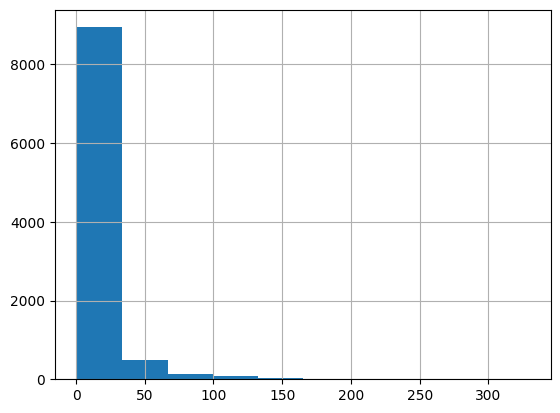

In [ ]:
# Count the occupied cells per column
occupied_count = user_ratings_df.notnull().sum()

# Sort the resulting series from low to high
sorted_occupied_count = occupied_count.sort_values()

# Plot a histogram of the values in sorted_occupied_count
sorted_occupied_count.hist()
plt.show()

Втрата інформації при факторизації

Як фактори з набагато меншою кількістю стовпців можуть підсумовувати більший DataFrame без втрат. Насправді це не так — фактори, які ми створюємо, зазвичай є близьким наближенням даних, оскільки втрата деякої інформації неминуча. Це означає, що прогнозовані значення можуть бути неточними, але мають бути достатньо близькими, щоб бути корисними.

## Singular value decomposition (SVD)

Перш ніж  знайти фактори матриці оцінок за допомогою розкладання за сингулярним числом,  потрібно  "зменшити середнє значення" або відцентрувати її, віднявши середнє значення кожного рядка від кожного значення в цьому рядку.

In [ ]:
# Get the average rating for each user
avg_ratings = user_ratings_df.mean(axis=1)

# Center each user's ratings around 0
user_ratings_centered = user_ratings_df.sub(avg_ratings, axis=0)

# Fill in all missing values with 0s
user_ratings_centered.fillna(0, inplace=True)

# Print the mean of each column
print(user_ratings_centered.mean(axis=1))

userId
1      4.386518e-18
2      6.397005e-19
3      8.681649e-19
4      4.569289e-18
5      5.483147e-19
           ...     
606   -1.900824e-17
607   -3.655431e-19
608   -1.553558e-17
609    3.655431e-19
610   -5.286668e-17
Length: 610, dtype: float64


In [ ]:
print((matrix_sparse != 0).sum())  # кількість ненульових елементів

5928350


### Розкладання матриці

In [ ]:
# Import the required libraries
from scipy.sparse.linalg import svds

# Decompose the matrix
U, sigma, Vt = svds(user_ratings_centered.values)

# Convert sigma into a diagonal matrix
sigma = np.diag(sigma)
print(sigma)

[[36.54884233  0.          0.          0.          0.          0.        ]
 [ 0.         37.95486323  0.          0.          0.          0.        ]
 [ 0.          0.         39.37049297  0.          0.          0.        ]
 [ 0.          0.          0.         41.77886272  0.          0.        ]
 [ 0.          0.          0.          0.         43.62209292  0.        ]
 [ 0.          0.          0.          0.          0.         76.20047266]]


### **Перерахунок матриці**

Тепер, коли  є трифакторні матриці,  можна перемножити їх, щоб отримати повні дані рейтингів без пропущених значень.

In [ ]:
# Dot product of U and sigma
U_sigma = np.dot(U, sigma)

# Dot product of result and Vt
U_sigma_Vt = np.dot(U_sigma, Vt)

# Add back on the row means contained in avg_ratings
uncentered_ratings = U_sigma_Vt + avg_ratings.values.reshape(-1, 1)

# Create DataFrame of the results
calc_pred_ratings_df = pd.DataFrame(uncentered_ratings,
                                    index=user_ratings_df.index,
                                    columns=user_ratings_df.columns
                                   )
# Print both the recalculated matrix and the original
display(calc_pred_ratings_df)
display(user_ratings_df)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.366758,4.366864,4.366117,4.366425,4.365874,4.367775,4.364110,4.365298,4.399567,4.366379,...,4.360731,4.365497,4.367345,4.366390,4.366333,4.387607,4.335274,4.357385,4.346337,4.366739
2,3.948463,3.948253,3.948293,3.948273,3.948342,3.948062,3.949374,3.948554,3.945010,3.948521,...,3.946941,3.949843,3.947476,3.947203,3.948247,3.945910,3.945743,3.946354,3.950818,3.948147
3,2.436697,2.435659,2.435996,2.435841,2.436166,2.435715,2.442690,2.438575,2.420862,2.439383,...,2.437677,2.441960,2.432665,2.431460,2.435774,2.427541,2.436665,2.430367,2.441795,2.435349
4,3.553547,3.556060,3.555342,3.555822,3.555180,3.558750,3.493632,3.545681,3.531246,3.544048,...,3.528199,3.539657,3.563222,3.566525,3.555780,3.588758,3.542657,3.579806,3.533643,3.557405
5,3.636042,3.636611,3.636259,3.636443,3.636168,3.637921,3.632567,3.635113,3.639293,3.635552,...,3.635141,3.632319,3.638571,3.639009,3.636443,3.645666,3.635973,3.638589,3.627942,3.636997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.656747,3.660728,3.655946,3.658587,3.655294,3.677603,3.553893,3.638496,3.686535,3.674837,...,3.665024,3.630286,3.673631,3.673444,3.658190,3.796002,3.655214,3.648094,3.530404,3.662434
607,3.785770,3.786352,3.785971,3.786110,3.785747,3.785805,3.790275,3.784962,3.821457,3.787387,...,3.796064,3.783058,3.788082,3.788376,3.786204,3.794007,3.789866,3.783980,3.777680,3.786174
608,3.144360,3.135605,3.133463,3.134770,3.134419,3.111664,2.848560,3.096719,3.385000,3.245631,...,3.290693,3.227688,3.091068,3.072951,3.134055,3.219383,3.175218,2.972337,3.070776,3.116531


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


## Розробка рекомендацій за допомогою SVD

Тепер, коли є матриця з усіма заповненими прогалинами, наступним кроком є ​​використання її для створення прогнозів та рекомендацій.

In [ ]:
# Sort the ratings of User 5 from high to low
user_5_ratings = calc_pred_ratings_df.iloc[5,:].sort_values(ascending=False)

print('Прогноз для користувача 5')
print(user_5_ratings.head(10))

Прогноз для користувача 5
title
Star Wars: Episode I - The Phantom Menace (1999)                 3.700940
Independence Day (a.k.a. ID4) (1996)                             3.695129
Forrest Gump (1994)                                              3.682642
Star Wars: Episode VI - Return of the Jedi (1983)                3.669336
Back to the Future (1985)                                        3.667551
Pirates of the Caribbean: The Curse of the Black Pearl (2003)    3.658449
Lion King, The (1994)                                            3.655774
Fugitive, The (1993)                                             3.652404
X-Men (2000)                                                     3.650280
Jurassic Park (1993)                                             3.642692
Name: 6, dtype: float64


# Перевірка прогнозів

**Які метрики використовувати?**

Для задач передбачення рейтингу (Rating Prediction) найкраще підходять:

RMSE (Root Mean Squared Error) — те, що ви використовували. Сильніше "карає" за великі помилки (наприклад, передбачили 5, а насправді 1).

MAE (Mean Absolute Error) — середня абсолютна помилка. Її легше інтерпретувати (наприклад, "ми помиляємося в середньому на 0.8 зірочки").

**Як правильно оцінити модель?**

Потрібно штучно приховати частину відомих оцінок (зробити їх NaN або винести в окрему матрицю), навчити модель на решті даних, а потім порівняти передбачення саме для тих клітинок, які ви приховали.

In [ ]:
from scipy.sparse.linalg import svds
from sklearn.metrics import mean_squared_error
from math import sqrt

#  ФУНКЦІЯ ДЛЯ СТВОРЕННЯ TRAIN / TEST
def train_test_split_matrix(df, test_ratio=0.2):
    """
    Ховає test_ratio випадкових оцінок з df для тестування.
    Повертає:
    - train_df: датафрейм з дірками (NaN) на місці тестових даних
    - test_matrix: матриця, де заповнені лише ті комірки, які ми сховали
    """
    train_df = df.copy()
    test_matrix = np.full(df.shape, np.nan)

    # Знаходимо координати всіх існуючих оцінок (не NaN)
    rows, cols = np.where(~np.isnan(df.values))

    # Фіксуємо random seed для відтворюваності результату
    np.random.seed(42)

    # Вибираємо випадкові індекси для тесту
    num_test = int(len(rows) * test_ratio)
    test_indices_idx = np.random.choice(np.arange(len(rows)), size=num_test, replace=False)

    # Заповнюємо тестову матрицю і чистимо тренувальну
    # Використовуємо цикли для надійності, хоча можна векторизувати
    for idx in test_indices_idx:
        r, c = rows[idx], cols[idx]
        test_matrix[r, c] = df.values[r, c] # Зберігаємо правду
        train_df.iloc[r, c] = np.nan        # Ховаємо від моделі

    print(f"Дані розділено: {len(rows) - num_test} у навчанні, {num_test} у тесті.")
    return train_df, test_matrix

#  ФУНКЦІЯ ОЦІНКИ (RMSE)
def calculate_rmse(pred_matrix, actual_matrix):
    """
    Рахує RMSE тільки для наявних значень у actual_matrix (тестова вибірка)
    """
    # Маска: де є дані в тесті
    mask = ~np.isnan(actual_matrix)

    preds = pred_matrix[mask]
    actuals = actual_matrix[mask]

    # Захист від NaN у передбаченнях (на всяк випадок)
    preds = np.nan_to_num(preds)

    mse = mean_squared_error(actuals, preds)
    return sqrt(mse)


#  Розділяємо дані
print("Розпочинаємо розділення даних...")
train_df, test_matrix = train_test_split_matrix(user_ratings_df, test_ratio=0.2)


# СПОСІБ 1: BASELINE (СЕРЕДНЄ ПО ФІЛЬМУ)
print("\nОбчислюємо Baseline (Item Average)...")

# Рахуємо середнє по кожному фільму (стовпчику) в train_df
item_means = train_df.mean(axis=0)
global_mean = train_df.stack().mean() # Загальне середнє по всьому датасету

# Створюємо матрицю передбачень
pred_baseline_df = train_df.copy()

for col in pred_baseline_df.columns:
    # Якщо фільм має середнє, беремо його, якщо ні (новий фільм) - загальне середнє
    col_val = item_means[col] if not pd.isna(item_means[col]) else global_mean
    # Заповнюємо NaN середнім значенням
    pred_baseline_df[col] = pred_baseline_df[col].fillna(col_val)

rmse_baseline = calculate_rmse(pred_baseline_df.values, test_matrix)


# СПОСІБ 2: SVD (MATRIX FACTORIZATION)
print("Обчислюємо SVD...")

#  Нормалізація: віднімаємо середнє користувача
user_avg = train_df.mean(axis=1).fillna(0) # Захист від користувачів без оцінок
train_centered = train_df.sub(user_avg, axis=0)
train_centered = train_centered.fillna(0) # SVD не приймає NaN, заповнюємо нулями

#  Декомпозиція
# k - кількість прихованих факторів. Для 600 юзерів оптимально 20-50.
k_factors = 20
U, sigma, Vt = svds(train_centered.values, k=k_factors)
sigma = np.diag(sigma)

# Реконструкція матриці
pred_centered = np.dot(np.dot(U, sigma), Vt)

# Повертаємо середні значення користувачів назад
pred_svd_val = pred_centered + user_avg.values.reshape(-1, 1)

rmse_svd = calculate_rmse(pred_svd_val, test_matrix)


#  ВИВІД РЕЗУЛЬТАТІВ
print("-" * 40)
print(f"Результати перевірки на відкладених даних:")
print(f"1. Baseline RMSE (Item Mean): {rmse_baseline:.4f}")
print(f"2. SVD RMSE (k={k_factors}):      {rmse_svd:.4f}")
print("-" * 40)

if rmse_svd < rmse_baseline:
    print("Висновок: SVD працює краще! Можна використовувати для рекомендацій.")
else:
    print("Висновок: Baseline кращий. Спробуйте змінити k в SVD (наприклад, 10 або 50).")

Розпочинаємо розділення даних...
Дані розділено: 80666 у навчанні, 20166 у тесті.

Обчислюємо Baseline (Item Average)...
Обчислюємо SVD...
----------------------------------------
Результати перевірки на відкладених даних:
1. Baseline RMSE (Item Mean): 0.9819
2. SVD RMSE (k=20):      0.9209
----------------------------------------
Висновок: SVD працює краще! Можна використовувати для рекомендацій.
